# Introduction #

This project aims to analyze coup events across various countries and then use socioeconomic indicators to predict a future coup attempt. The first dataset includes information about coups, including the date, type of event (coup, attempted, conspiracy), and various outcomes (e.g., realized, unrealized, injuries, deaths). The second dataset includes socioeconomic information about countries including GDP, HDI, Population, Birthrate, GDP(PPP), and etc.

### Motivation
Understanding the patterns and causes of coup events can help in analyzing political stability and the factors contributing to future coup attempts. Being able to predict future attempts can help improve political stability. 

### Questions
1. Which countries have experienced the most coup events?
2. How do the types of coup events vary across different countries and time periods?
3. Which socioeconmic indicators can cause and predict future coup events? 
4. Which model can best predict future coup attempts?

### Background

Coups are sudden and often violent takeovers of a government by a small group, usually involving the military. They have been common in many regions, especially in Africa, Latin America, and parts of Asia. Coups can drastically change the political situation in a country and often have negative effects on political stability, economic growth, freedom and safety

#### Negative Impacts of Coups

1. **Political Instability**:
   - Coups create a period of uncertainty and instability. They disrupt normal political processes and can lead to power struggles. This instability can make people lose trust in their government.

2. **Economic Decline**:
   - The economy usually suffers after a coup. Investors lose confidence, leading to less investment and economic growth. Countries may face sanctions from other nations, making economic recovery even harder.

3. **Social Unrest**:
   - Coups often lead to protests and violence. Governments may impose strict measures like curfews, which can increase tensions among the population.

4. **Human Rights Violations**:
   - After a coup, human rights abuses often increase. Political opponents, activists, and journalists can be targeted, leading to arrests, torture, and sometimes killings. With democratic processes suspended, there are fewer checks on power, allowing abuses to continue.

#### Importance of Predicting Future Coups

1. **Preventative Measures**:
   - Predicting future coups can help governments and international organizations take steps to prevent them. This might include diplomatic actions, economic aid, or support for democratic institutions to address instability.

2. **Resource Allocation**:
   - Prediction models can help direct resources to areas most at risk of coups. Governments and NGOs can focus their efforts where they are most needed, ensuring better use of resources.

3. **Stability and Development**:
   - Political stability is key for development. Predicting and preventing coups can help maintain a stable environment for economic growth and development. Stability allows for long-term planning and better policies for improving people's lives.

4. **Global Security**:
   - Instability in one country can affect global security. Predicting coups can help prevent regional conflicts, mass migrations, and the spread of extremist ideologies. A stable world is safer and more prosperous for everyone.


Understanding and predicting coups is important for maintaining political stability, economic growth, and safety in countries. Coups have severe negative impacts, including political instability, economic decline, social unrest, and human rights violations. By predicting future coups, policymakers and international organizations can take steps to prevent them, allocate resources efficiently, and promote stability and development. This proactive approach benefits both the countries at risk and contributes to global security and prosperity.

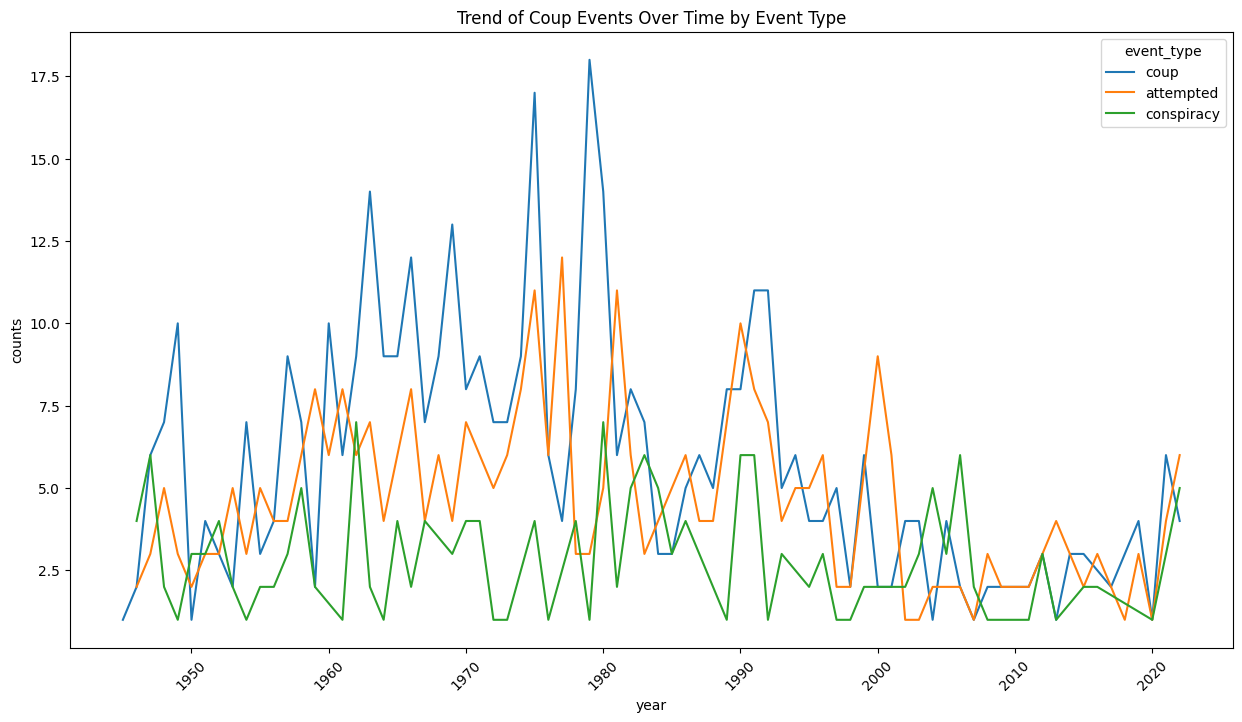

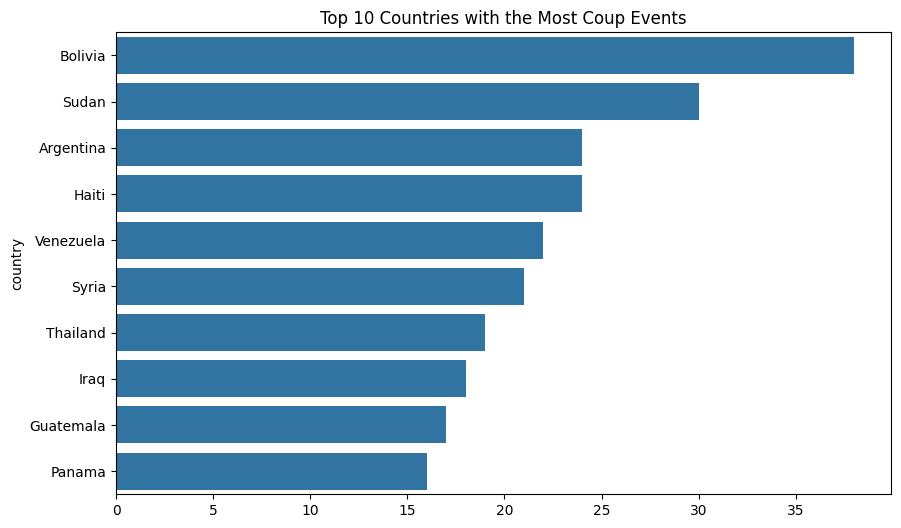

In [8]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('/home/jovyan/DH140-Final-Project/Coup data.csv')
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])



# 2. Trend of coup events over time by event type
plt.figure(figsize=(15, 8))
data['year'] = data['date'].dt.year
event_type_counts = data.groupby(['year', 'event_type']).size().reset_index(name='counts')
sns.lineplot(x='year', y='counts', hue='event_type', data=event_type_counts)
plt.title('Trend of Coup Events Over Time by Event Type')
plt.xticks(rotation=45)
plt.show()


# 4. Top 10 countries with the most coup events
top_countries = data['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries with the Most Coup Events')
plt.show()

# Methods #

## Pre-processing Data ##

## 1. Loading Data:
- Load the original datasets for coup events and country socioeconomic data.
- Merge these datasets into a single dataframe containing both socioeconomic indicators and coup event counts.

## 2. Data Cleaning:
- Remove NaN values from both datasets to ensure clean data for merging.
- Merge the datasets using a common key (e.g., country name) to combine socioeconomic data with coup event data.
- For the merged dataset, combine coup-related columns (e.g., attempted, conspiracy, coup) into a single "Coup attempts" statistic for each country by summing these columns.
- Drop the original coup-related columns, need only one binary varaible

## 3. Target Variable Simplification:
- Simplify the target variable by converting the "Coup attempts" statistic into a binary variable (`0` for no coup attempts, `1` for any coup attempts). This makes the classification problem binary, which is easier to model and interpret. We don't need a number of events, only if one has happened or not, as the goal is only to predict if a future coup is going to occur soon, not how many.

## 4. Feature and Target Selection:
- Drop non-numeric and irrelevant columns (e.g., country names, regions) to focus on numeric features.
- Define the features (`X`) as all relevant numeric columns except the target variable.
- Define the target (`y`) as the binary "Coup attempts" variable.

## 5. Splitting Data:
- Split the data into training and testing sets using an 70-30 split to train the model and evaluate its performance.

## 6. Model Training:
- Initialize and train a Random Forest classifier using the training data.
- Use the trained model to make predictions on the test data
- Redo all the steps using a Logistic Regression model

## 7. Model Evaluation:
- Evaluate the model's performance using accuracy, classification report, and cross-validation.
- Calculate and display the ROC curve and AUC to understand the model's ability to distinguish between the classes.

### Explanation of Model Choices for Classifying Coup Data

When analyzing and predicting coup events using socioeconomic data, it's important to choose appropriate models that can handle the characteristics of the dataset effectively. Two commonly used models for classification tasks are Random Forest and Logistic Regression. Each model has its strengths and weaknesses, making them suitable for different aspects of the analysis. I will be using both, and then selecting the stronger model for my results and conclusion. 

#### Random Forest Model

**Why Use Random Forest?**

1. **Handling Non-Linear Relationships**:
   - Random Forest is a non-linear model, meaning it can capture complex relationships and interactions between features.This is particularly useful in real-world data where such interactions are common.

2. **Robustness to Outliers and Noise**:
   - Random Forest is an ensemble learning method that uses multiple decision trees and aggregates their predictions. This process makes it robust to outliers and noisy data, providing more stable and reliable predictions.

3. **Feature Importance**:
   - Random Forest models provide insights into feature importance, helping to identify which socioeconomic indicators are most influential in predicting coups. This can be valuable for understanding the underlying factors driving political instability.

4. **Handling Missing Values and Imbalanced Data**:
   - Random Forest can handle missing values and is less affected by imbalanced data, which is common in datasets with rare events like coups. It uses techniques like class weighting to adjust for imbalance, improving predictive performance for minority classes.


#### Logistic Regression Model

**Why Use Logistic Regression?**

1. **Simplicity and Interpretability**:
   - Logistic Regression is a linear model that is simple to implement and interpret. The coefficients of the model can be directly understood as the effect of each predictor on the likelihood of the target event (e.g., coup occurrence).

2. **Baseline Model**:
   - Logistic Regression serves as a good baseline model for classification tasks. It provides a straightforward way to assess the predictive power of the features before moving on to more complex models.

3. **Efficiency with Large Datasets**:
   - Logistic Regression is computationally efficient, making it suitable for large datasets. It converges quickly and requires fewer resources compared to complex models like Random Forest.

4. **Regularization**:
   - Logistic Regression can be extended with regularization techniques (L1 and L2) to prevent overfitting and handle multicollinearity. This helps in improving model generalization on new data.



## Random Forest ##

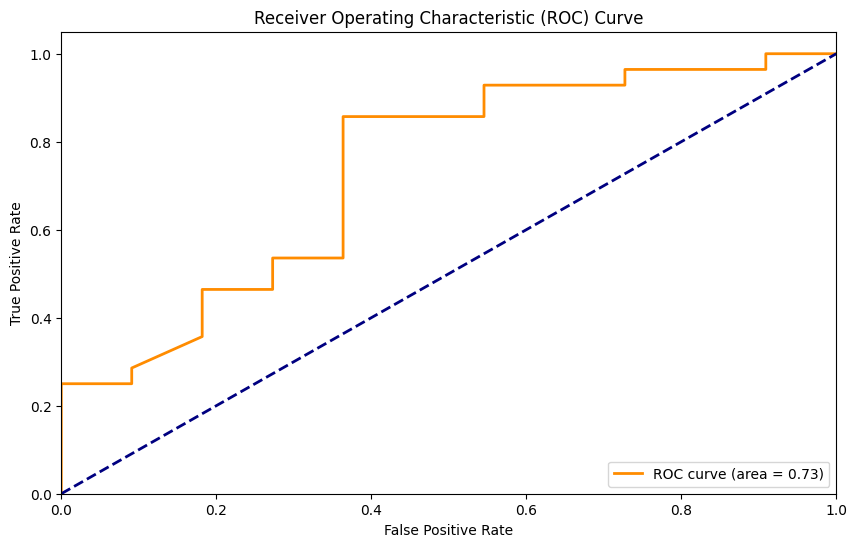

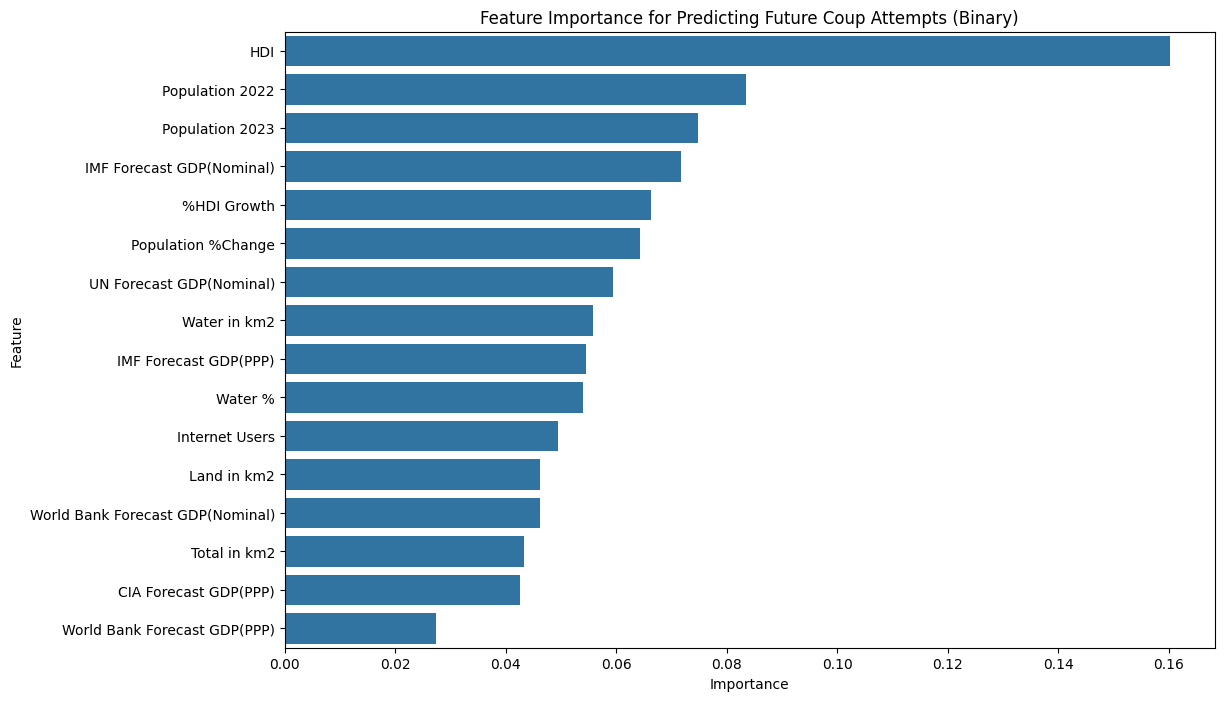

Cross-Validation Accuracy Scores: [0.80769231 0.80769231 0.73076923 0.76923077 0.84      ]
Cross-Validation AUC Scores: [0.82986111 0.86805556 0.69097222 0.63888889 0.85661765]
Average Cross-Validation Accuracy: 0.791076923076923
Average Cross-Validation AUC: 0.7768790849673203
Accuracy: 0.7948717948717948
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.64      0.64        11
           1       0.86      0.86      0.86        28

    accuracy                           0.79        39
   macro avg       0.75      0.75      0.75        39
weighted avg       0.79      0.79      0.79        39



In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


coup_data_path = '/home/jovyan/DH140-Final-Project/Coup data.csv'
country_data_path = '/home/jovyan/DH140-Final-Project/Country_data.csv'

coup_data = pd.read_csv(coup_data_path)
country_data = pd.read_csv(country_data_path)

coup_data_cleaned = coup_data.dropna()
country_data_cleaned = country_data.dropna()


coup_summary = coup_data_cleaned.groupby('country')['event_type'].value_counts().unstack().fillna(0).reset_index()

merged_data = pd.merge(country_data_cleaned, coup_summary, how='left', left_on='Country', right_on='country').drop(columns=['country'])


merged_data_path = '/home/jovyan/DH140-Final-Project/Merged_Country_Coup_Data.csv'
merged_data.to_csv(merged_data_path, index=False)

coup_columns = ['attempted', 'conspiracy', 'coup']
for col in coup_columns:
    merged_data[col] = merged_data[col].fillna(0)

merged_data['Coup attempts'] = merged_data[coup_columns].sum(axis=1)

merged_data = merged_data.drop(columns=coup_columns)

updated_merged_data_path = '/home/jovyan/DH140-Final-Project/Updated_Merged_Country_Coup_Data.csv'
merged_data.to_csv(updated_merged_data_path, index=False)

numeric_data = merged_data.drop(columns=['Country', 'UN Continental Region', 'UN Statistical Subregion']).fillna(0)

X = numeric_data.drop(columns=['Coup attempts'])
y = numeric_data['Coup attempts']

merged_data['Coup attempts binary'] = merged_data['Coup attempts'].apply(lambda x: 1 if x > 0 else 0)


numeric_data = merged_data.drop(columns=['Country', 'UN Continental Region', 'UN Statistical Subregion']).fillna(0)


X = numeric_data.drop(columns=['Coup attempts', 'Coup attempts binary'])
y = numeric_data['Coup attempts binary']

# Split the data into training and testing sets
_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Cross-validation
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
cv_accuracy = cross_val_score(rf_model, X, y, cv=cv, scoring='accuracy')
cv_auc = cross_val_score(rf_model, X, y, cv=cv, scoring='roc_auc')


y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Get feature importance
feature_importances = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances['importance'], y=feature_importances.index)
plt.title('Feature Importance for Predicting Future Coup Attempts (Binary)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Display the cross-validation accuracy and AUC
cv_accuracy_mean = cv_accuracy.mean()
cv_auc_mean = cv_auc.mean()

print("Cross-Validation Accuracy Scores:", cv_accuracy)
print("Cross-Validation AUC Scores:", cv_auc)
print(f'Average Cross-Validation Accuracy: {cv_accuracy.mean()}')
print(f'Average Cross-Validation AUC: {cv_auc.mean()}')
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

# Results #

### Analysis of Results

#### Feature Importance
The feature importance plot shows which features have the most influence on predicting future coup attempts. The top three features are:

1. **HDI (Human Development Index)**: This feature has the highest importance, suggesting that countries with different levels of human development have varying risks of coup attempts. This supports the belief that developing countries will have the highest chance of a coup attempt. 
2. **Population 2022 & 2023**: The population of a country in recent years is also a significant predictor, indicating that higher, denser populations may lead to more instability.
3. **IMF Forecast GDP (Nominal)**: Economic forecasts, particularly nominal GDP, are critical in determining the stability and risk of coups in a country. This shows that lower GDP, likely leads to more political instability. 

Other important features include %HDI Growth, Population %Change, UN Forecast GDP (Nominal), and various other economic and geographical indicators.

#### ROC Curve
The ROC curve plots the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The area under the ROC curve (AUC) is 0.73, indicating a reasonable ability of the model to distinguish between countries with and without coup attempts. A perfect model would have an AUC of 1.0, while a model with no discriminative ability would have an AUC of 0.5.

#### Cross-Validation Scores
- **Cross-Validation Accuracy Scores**: The accuracy scores from 5-fold cross-validation are consistently high, ranging from approximately 0.73 to 0.84, with an average accuracy of 0.791. This indicates that the model performs well across different subsets of the data.
- **Cross-Validation AUC Scores**: The AUC scores from cross-validation range from approximately 0.64 to 0.87, with an average AUC of 0.777. This shows that the model has a good ability to distinguish between classes across different data folds.

#### Test Set Evaluation
- **Accuracy**: The model achieves an accuracy of 0.795 on the test set, which is consistent with the cross-validation accuracy. This suggests that the model generalizes well to unseen data.
- **Classification Report**: The classification report provides precision, recall, and F1-score for both classes (0 and 1). The model performs better for class 1 (countries with coup attempts), with a precision and recall of 0.86. For class 0 (countries without coup attempts), the precision and recall are both 0.64. The overall weighted average precision, recall, and F1-score are approximately 0.79.

### Summary
The model shows good performance in predicting future coup attempts, with HDI, population, and economic indicators being the most important features. The ROC curve and AUC indicate a reasonable discriminative ability, and cross-validation confirms the model's robustness. The classification report highlights the model's effectiveness, particularly for predicting countries with coup attempts.

Overall, this analysis suggests that the Random Forest classifier is a suitable model for predicting future coup attempts based on the provided socioeconomic and demographic data. The model highlights that a country's development is a key indicator of political stability. 

## Logistic Regression ##

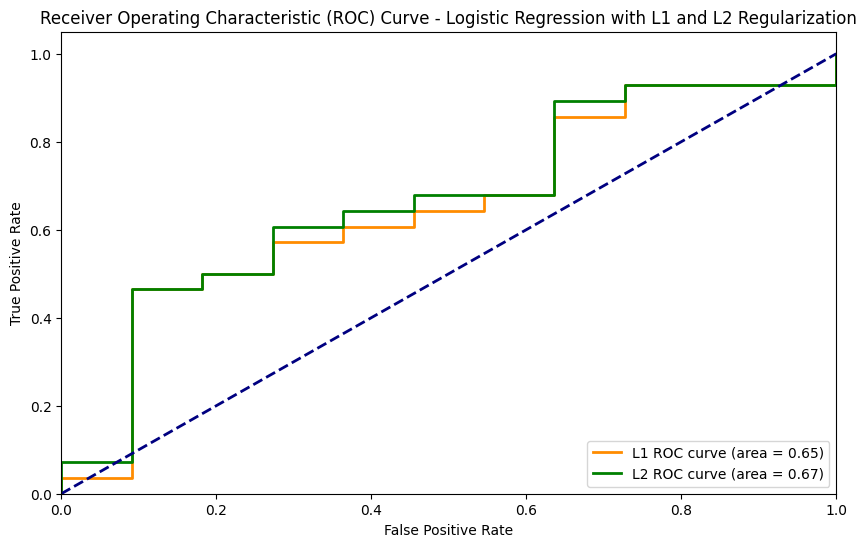

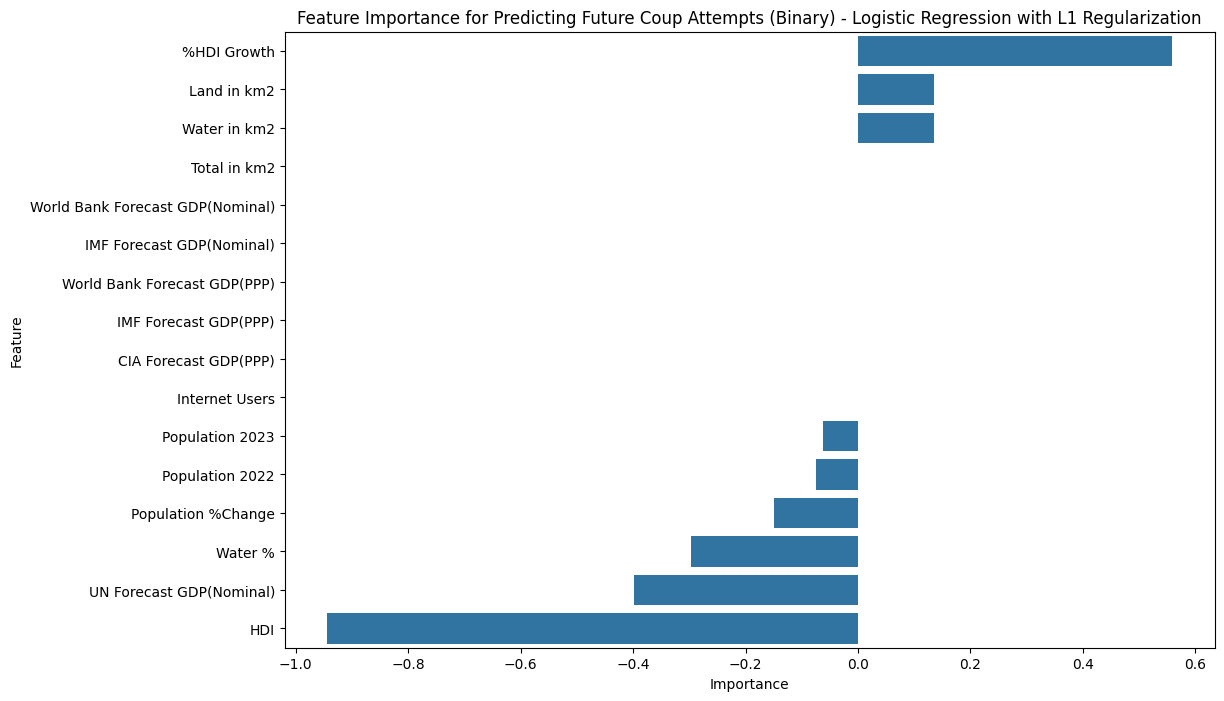

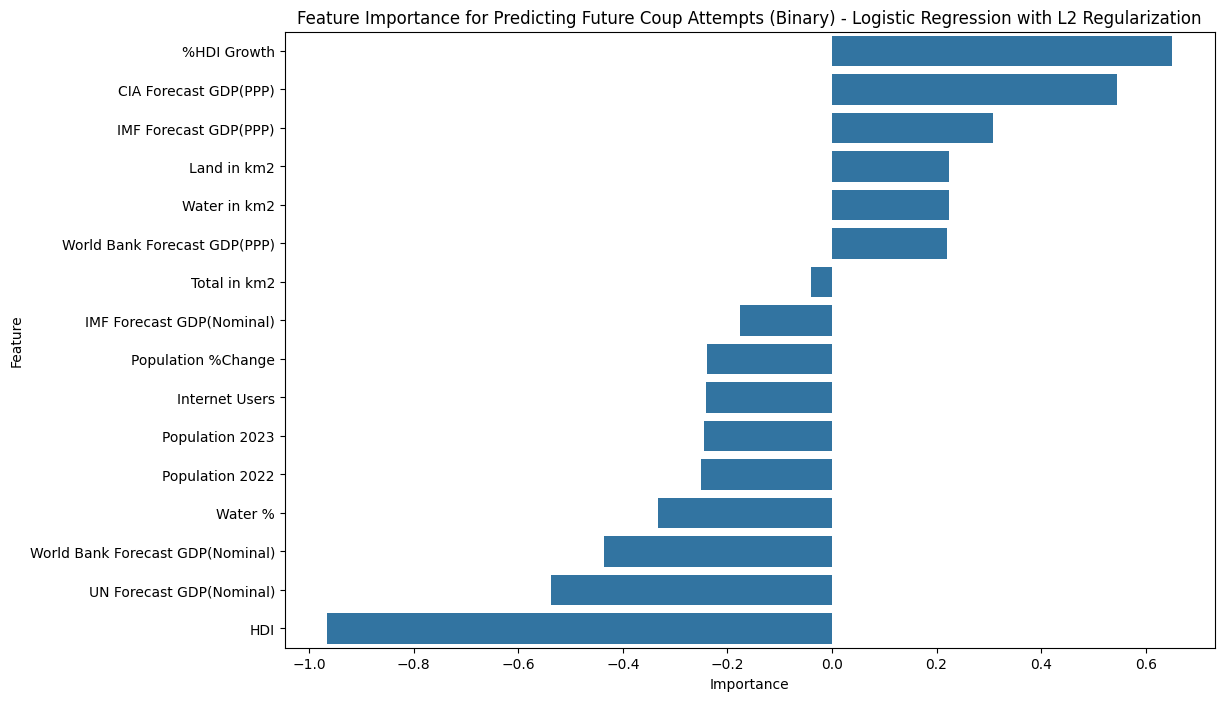

Logistic Regression with L1 Regularization Cross-Validation Accuracy Scores: [0.80769231 0.80769231 0.80769231 0.69230769 0.6       ]
Logistic Regression with L1 Regularization Cross-Validation AUC Scores: [0.77083333 0.77777778 0.75       0.70138889 0.66911765]
Average Logistic Regression with L1 Regularization Cross-Validation Accuracy: 0.7430769230769232
Average Logistic Regression with L1 Regularization Cross-Validation AUC: 0.7338235294117647
Logistic Regression with L1 Regularization Accuracy: 0.6923076923076923
Logistic Regression with L1 Regularization Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.36      0.40        11
           1       0.77      0.82      0.79        28

    accuracy                           0.69        39
   macro avg       0.61      0.59      0.60        39
weighted avg       0.68      0.69      0.68        39

Logistic Regression with L2 Regularization Cross-Validation Accuracy Scores: [0.807

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#
pipeline_l1 = make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', solver='saga', max_iter=5000, random_state=42))
pipeline_l2 = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', solver='lbfgs', max_iter=5000, random_state=42))


cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
cv_accuracy_logreg_l1 = cross_val_score(pipeline_l1, X, y, cv=cv, scoring='accuracy')
cv_auc_logreg_l1 = cross_val_score(pipeline_l1, X, y, cv=cv, scoring='roc_auc')


cv_accuracy_logreg_l2 = cross_val_score(pipeline_l2, X, y, cv=cv, scoring='accuracy')
cv_auc_logreg_l2 = cross_val_score(pipeline_l2, X, y, cv=cv, scoring='roc_auc')

# Train the model on the entire training set for L1
pipeline_l1.fit(X_train, y_train)
# Train the model on the entire training set for L2
pipeline_l2.fit(X_train, y_train)


y_pred_logreg_l1 = pipeline_l1.predict(X_test)
accuracy_logreg_l1 = accuracy_score(y_test, y_pred_logreg_l1)
report_logreg_l1 = classification_report(y_test, y_pred_logreg_l1)


y_pred_logreg_l2 = pipeline_l2.predict(X_test)
accuracy_logreg_l2 = accuracy_score(y_test, y_pred_logreg_l2)
report_logreg_l2 = classification_report(y_test, y_pred_logreg_l2)


y_pred_proba_logreg_l1 = pipeline_l1.predict_proba(X_test)[:, 1]

y_pred_proba_logreg_l2 = pipeline_l2.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for L1
fpr_logreg_l1, tpr_logreg_l1, _ = roc_curve(y_test, y_pred_proba_logreg_l1)
roc_auc_logreg_l1 = auc(fpr_logreg_l1, tpr_logreg_l1)

# Calculate ROC curve and AUC for L2
fpr_logreg_l2, tpr_logreg_l2, _ = roc_curve(y_test, y_pred_proba_logreg_l2)
roc_auc_logreg_l2 = auc(fpr_logreg_l2, tpr_logreg_l2)


plt.figure(figsize=(10, 6))
plt.plot(fpr_logreg_l1, tpr_logreg_l1, color='darkorange', lw=2, label=f'L1 ROC curve (area = {roc_auc_logreg_l1:.2f})')
plt.plot(fpr_logreg_l2, tpr_logreg_l2, color='green', lw=2, label=f'L2 ROC curve (area = {roc_auc_logreg_l2:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression with L1 and L2 Regularization')
plt.legend(loc="lower right")
plt.show()

# Get feature importance (coefficients) for L1
logreg_model_l1 = pipeline_l1.named_steps['logisticregression']
feature_importances_logreg_l1 = pd.DataFrame(logreg_model_l1.coef_[0], index=X.columns, columns=['importance']).sort_values('importance', ascending=False)

# Get feature importance (coefficients) for L2
logreg_model_l2 = pipeline_l2.named_steps['logisticregression']
feature_importances_logreg_l2 = pd.DataFrame(logreg_model_l2.coef_[0], index=X.columns, columns=['importance']).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances_logreg_l1['importance'], y=feature_importances_logreg_l1.index)
plt.title('Feature Importance for Predicting Future Coup Attempts (Binary) - Logistic Regression with L1 Regularization')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances_logreg_l2['importance'], y=feature_importances_logreg_l2.index)
plt.title('Feature Importance for Predicting Future Coup Attempts (Binary) - Logistic Regression with L2 Regularization')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


cv_accuracy_logreg_l1_mean = cv_accuracy_logreg_l1.mean()
cv_auc_logreg_l1_mean = cv_auc_logreg_l1.mean()

print("Logistic Regression with L1 Regularization Cross-Validation Accuracy Scores:", cv_accuracy_logreg_l1)
print("Logistic Regression with L1 Regularization Cross-Validation AUC Scores:", cv_auc_logreg_l1)
print(f'Average Logistic Regression with L1 Regularization Cross-Validation Accuracy: {cv_accuracy_logreg_l1_mean}')
print(f'Average Logistic Regression with L1 Regularization Cross-Validation AUC: {cv_auc_logreg_l1_mean}')
print(f'Logistic Regression with L1 Regularization Accuracy: {accuracy_logreg_l1}')
print('Logistic Regression with L1 Regularization Classification Report:')
print(report_logreg_l1)

cv_accuracy_logreg_l2_mean = cv_accuracy_logreg_l2.mean()
cv_auc_logreg_l2_mean = cv_auc_logreg_l2.mean()

print("Logistic Regression with L2 Regularization Cross-Validation Accuracy Scores:", cv_accuracy_logreg_l2)
print("Logistic Regression with L2 Regularization Cross-Validation AUC Scores:", cv_auc_logreg_l2)
print(f'Average Logistic Regression with L2 Regularization Cross-Validation Accuracy: {cv_accuracy_logreg_l2_mean}')
print(f'Average Logistic Regression with L2 Regularization Cross-Validation AUC: {cv_auc_logreg_l2_mean}')
print(f'Logistic Regression with L2 Regularization Accuracy: {accuracy_logreg_l2}')
print('Logistic Regression with L2 Regularization Classification Report:')
print(report_logreg_l2)

### Results and Analysis

#### Logistic Regression with L1 and L2 Regularization

1. **Moderate AUC and Accuracy**:
   - The AUC values for both L1 (0.65) and L2 (0.67) regularization indicate moderate ability to distinguish between classes (countries with and without coup attempts).
   - The accuracy scores (0.69 for L1 and 0.72 for L2) reflect a similar moderate performance.

2. **Feature Importance**:
   - L1 regularization results in a sparser model, highlighting a few key features such as `%HDI Growth`, `Land in km²`, and `Water in km²`.
   - L2 regularization spreads the importance across more features, including economic indicators like `CIA Forecast GDP (PPP)` and `IMF Forecast GDP (PPP)`.

3. **Class Imbalance**:
   - One reason for the moderate performance could be class imbalance. The dataset after pre-processing includes all countries and has much more countries without coup attempts than with them. This imbalance can affect the model's ability to learn and predict the minority class accurately.
   - The classification reports show that precision, recall, and f1-scores for class 0 (no coup attempts) are lower compared to class 1 (coup attempts), indicating difficulty in predicting the minority class.

4. **Model Simplicity**:
   - Logistic Regression is a linear model. It assumes a linear relationship between the features and the log odds of the target. This simplicity can be a limitation when the true relationship is more complex.
   - The dataset might have non-linear relationships or interactions between features that Logistic Regression cannot capture effectively.

#### Random Forest Model

1. **Higher Accuracy and AUC**:
   - The Random Forest model showed a higher accuracy (~0.79) and better performance metrics overall compared to Logistic Regression.
   - Cross-validation AUC scores for the Random Forest model were higher (~0.78), indicating better discriminative ability.

2. **Handling Non-Linearity and Interactions**:
   - Random Forest is a non-linear model that can capture complex relationships and interactions between features.
   - It constructs multiple decision trees and averages their predictions, allowing it to model non-linear patterns and interactions that Logistic Regression might miss.

3. **Feature Importance**:
   - Random Forest provides a more balanced feature importance, taking into account the combined effect of features.
   - It can handle both numerical and categorical data well, and it is robust to outliers and noise in the data.

4. **Class Imbalance**:
   - Random Forest can handle class imbalance better through techniques like class weighting or sampling strategies within the ensemble.
   - It can be more effective in identifying minority class instances, improving recall and precision for the underrepresented class.


### Model Selection

The Random Forest model outperforms Logistic Regression with L1 and L2 regularization due to its ability to capture complex non-linear relationships and interactions between features. It is also more robust to class imbalance and provides better overall performance metrics. Logistic Regression, being a linear model, is simpler and might not capture the intricacies in the dataset, leading to moderate performance.

For datasets with complex patterns and potential non-linear relationships, models like Random Forest, which can capture such complexities, tend to perform better. Logistic Regression in this case is not reliable and cannot classify the future coup attempts well. 

## Discussion

This project aimed to analyze coup events across various countries and use socioeconomic indicators to predict future coup attempts. The analysis revealed that Bolivia, Sudan, Argentina, Haiti, Venezuela, Syria, Thailand, Iraq, Guatemala, and Panama are the top 10 countries with the most coup events, with Bolivia experiencing the highest number. The types of coup events, including coups, attempts, and conspiracies, varied significantly across different countries and time periods, influenced by unique political, economic, and social factors.

Key socioeconomic indicators identified as predictors of future coup attempts include the Human Development Index (HDI), population size in recent years, economic forecasts from institutions like the IMF, World Bank, and UN, as well as growth rates in HDI and population. The Random Forest model outperformed Logistic Regression with L1 and L2 regularization in predicting future coup attempts, achieving a higher accuracy (0.79) and better cross-validation AUC scores (0.78). The Random Forest model’s superior performance is attributed to its ability to capture complex non-linear relationships and interactions between features, handle class imbalance effectively, and provide robust predictions despite outliers and noise.

Understanding the patterns and causes of coup events is crucial for analyzing political stability and identifying factors that contribute to future coup attempts. By leveraging models like Random Forest, policymakers and analysts can take proactive measures to enhance political stability and prevent future coups. This project underscores the importance of using advanced predictive models and comprehensive socioeconomic data to anticipate and mitigate the risks of political instability.